# 01: Exploratory Data Analysis of Cochrane Reviews

## Summary
This notebook explores the Cochrane review abstracts downloaded from PubMed. It provides an overview of the dataset including publication trends, abstract characteristics, and data quality.

**Pipeline Position:** Second notebook - understand the Cochrane reviews before fetching their included/excluded studies.

**What this notebook does:**
1. Loads and inspects the Cochrane abstracts dataset
2. Analyzes publication year distribution
3. Examines abstract lengths and content characteristics
4. Identifies any data quality issues

**Input:** `Data/cochrane_pubmed_abstracts.csv`

**Output:** Visualizations and summary statistics (no new data files)

In [8]:
# Load required libraries and set up file paths
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

notebook_dir = Path.cwd()
project_root = notebook_dir if (notebook_dir / "Data").exists() else notebook_dir.parent
DATA_DIR = project_root / "Data"
ABSTRACTS_CSV = DATA_DIR / "cochrane_pubmed_abstracts.csv"

print(f"Data directory: {DATA_DIR}")
print(f"Abstracts file exists: {ABSTRACTS_CSV.exists()}")

Data directory: c:\Users\juanx\Documents\LSE-UKHSA Project\Data
Abstracts file exists: True


In [9]:
# Load and inspect the Cochrane reviews dataset
abstracts = pd.read_csv(ABSTRACTS_CSV, dtype={"pmid": str, "year": str})
print(f"Total Cochrane reviews: {len(abstracts):,}")
print(f"\nColumn types:\n{abstracts.dtypes}")
print(f"\nMissing values:\n{abstracts.isnull().sum()}")
abstracts.head()

Total Cochrane reviews: 17,298

Column types:
pmid        object
title       object
abstract    object
doi         object
year        object
dtype: object

Missing values:
pmid          0
title         0
abstract    186
doi           1
year          0
dtype: int64


,pmid,title,abstract,doi,year
0,17636697,WITHDRAWN: Aldose reductase inhibitors for the...,Diabetic peripheral neuropathy is a common com...,10.1002/14651858.CD002182,1996
1,17636615,WITHDRAWN: Antiplatelet therapy for preventing...,People with nonrheumatic atrial fibrillation w...,10.1002/14651858.CD000186.pub2,1996
2,17636606,WITHDRAWN: Kinin-enhancing drugs for unexplain...,Oligo-astheno-teratospermia (sperm of low conc...,10.1002/14651858.CD000153,1996
3,17636589,WITHDRAWN: Human chorionic gonadotrophin for r...,There may be an association between recurrent ...,10.1002/14651858.CD000101.pub2,1996
4,17636588,WITHDRAWN: Gonadotrophin-releasing hormone ana...,Elevation of endogenous LH levels may result i...,10.1002/14651858.CD000097.pub2,1996


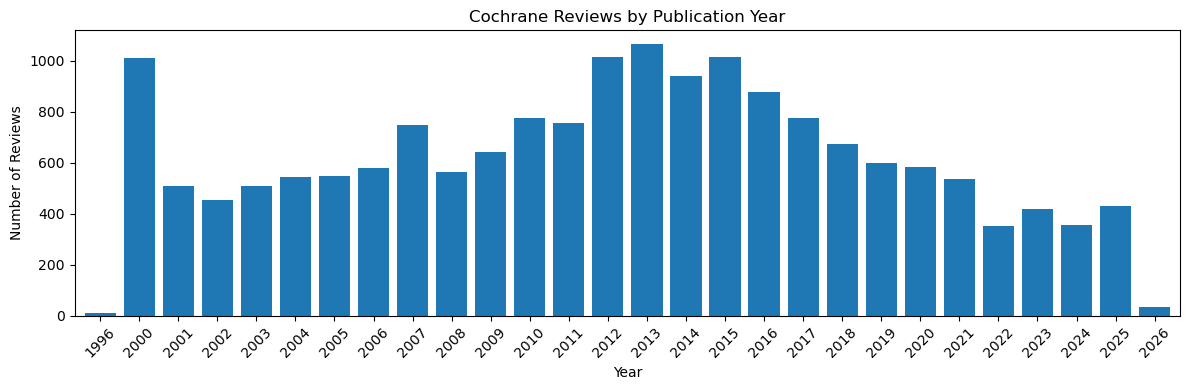


Year range: 1996 - 2026


In [10]:
# Plot the distribution of Cochrane reviews by publication year
abstracts["year_clean"] = pd.to_numeric(abstracts["year"].str[:4], errors="coerce")

fig, ax = plt.subplots(figsize=(12, 4))
year_counts = abstracts["year_clean"].dropna().astype(int).value_counts().sort_index()
year_counts.plot(kind="bar", ax=ax, width=0.8)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Reviews")
ax.set_title("Cochrane Reviews by Publication Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nYear range: {int(abstracts['year_clean'].min())} - {int(abstracts['year_clean'].max())}")

Abstract word count statistics:
count    17298.000000
mean       525.686264
std        239.250556
min          0.000000
25%        370.000000
50%        459.500000
75%        690.000000
max       4771.000000
Name: abstract_words, dtype: float64


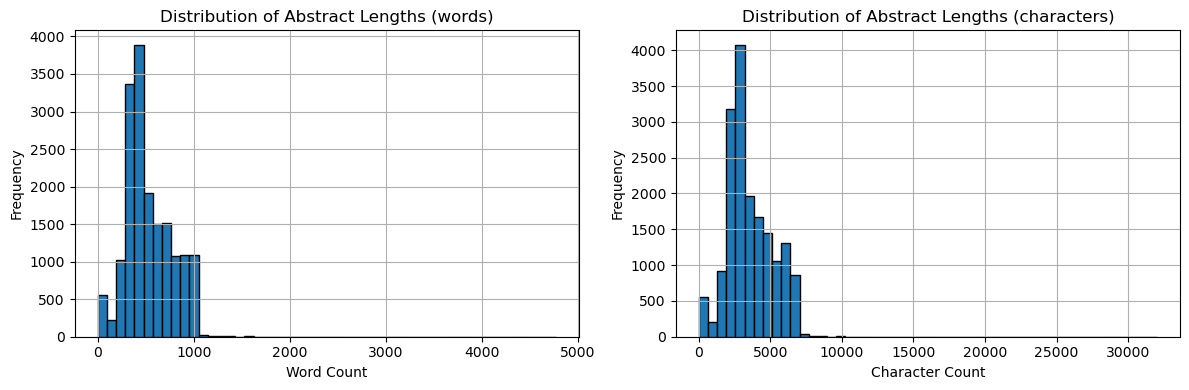

In [11]:
# Analyze abstract lengths to understand text characteristics
abstracts["abstract_words"] = abstracts["abstract"].fillna("").str.split().str.len()
abstracts["abstract_chars"] = abstracts["abstract"].fillna("").str.len()

print("Abstract word count statistics:")
print(abstracts["abstract_words"].describe())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

abstracts["abstract_words"].hist(bins=50, ax=axes[0], edgecolor="black")
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Abstract Lengths (words)")

abstracts["abstract_chars"].hist(bins=50, ax=axes[1], edgecolor="black")
axes[1].set_xlabel("Character Count")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Abstract Lengths (characters)")

plt.tight_layout()
plt.show()

In [12]:
# Check for reviews with very short or missing abstracts
short_abstracts = abstracts[abstracts["abstract_words"] < 50]
empty_abstracts = abstracts[abstracts["abstract"].isna() | (abstracts["abstract"] == "")]

print(f"Reviews with empty abstracts: {len(empty_abstracts):,}")
print(f"Reviews with short abstracts (<50 words): {len(short_abstracts):,}")
print(f"Reviews with substantial abstracts (>=50 words): {len(abstracts) - len(short_abstracts):,}")

Reviews with empty abstracts: 186
Reviews with short abstracts (<50 words): 403
Reviews with substantial abstracts (>=50 words): 16,895


In [13]:
# Display a sample abstract to understand content structure
sample = abstracts[abstracts["abstract_words"] > 200].sample(1).iloc[0]
print(f"Sample Review (PMID: {sample['pmid']})")
print(f"Title: {sample['title']}")
print(f"Year: {sample['year']}")
print(f"\nAbstract ({sample['abstract_words']} words):")
print(sample['abstract'][:1500] + "..." if len(sample['abstract']) > 1500 else sample['abstract'])

Sample Review (PMID: 37449968)
Title: Early versus late removal of urinary catheter after kidney transplantation.
Year: 2023

Abstract (544 words):
The optimal treatment for end-stage kidney disease is kidney transplantation. During the operation, a catheter is introduced into the bladder and remains in place postoperatively to allow the bladder to drain. This decreases tension from the cysto-ureteric anastomosis and promotes healing. Unfortunately, urinary catheters can pose an infection risk to patients as they allow bacteria into the bladder, potentially resulting in a urinary tract infection (UTI). The longer the catheter remains in place, the greater the risk of developing a UTI. There is no consensus approach to the time a catheter should remain in place post-transplant. Furthermore, the different timings of catheter removal are thought to be associated with different incidences of UTI and postoperative complications, such as anastomotic breakdown. This review aimed to compare pa

In [ ]:
# Summary statistics for the dataset
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total Cochrane reviews: {len(abstracts):,}")
print(f"Year range: {int(abstracts['year_clean'].min())} - {int(abstracts['year_clean'].max())}")
print(f"Reviews with abstracts: {abstracts['abstract'].notna().sum():,}")
print(f"Median abstract length: {abstracts['abstract_words'].median():.0f} words")
print(f"\nNext step: Run notebook 02 to download Cochrane PDFs via Wiley TDM API")

DATASET SUMMARY
Total Cochrane reviews: 17,298
Year range: 1996 - 2026
Reviews with abstracts: 17,112
Median abstract length: 460 words

Next step: Run notebook 02 to fetch categorized references via Wiley TDM
